In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
from sklearn.cluster import KMeans

data = pandas.read_csv('data.tsv', sep="\t", header=None, names=['date', 'id', 'type', 'hash', 'latitude', 'longitude'])
route_to_stops_count = pandas.read_csv('route_to_stops_count.tsv', sep="\t", header=None, names=['hash', 'num'])
debug = pandas.read_csv('debug.tsv', sep="\t", header=None, names=['type', 'hash', 'latitude', 'longitude'])

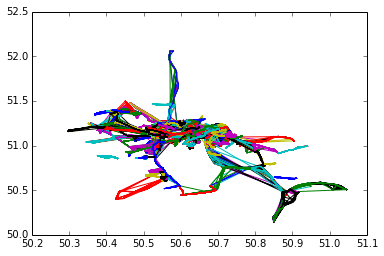

In [2]:
len_num = len(data["id"].unique())
for id in data["id"].unique():
    t = data[data["id"] == id]
    plt.plot(t['latitude'], t['longitude'])       

    

In [3]:
x = route_to_stops_count[route_to_stops_count["hash"] == 86]
k_means = KMeans(n_clusters = x["num"][0])
data_bus = data[data["hash"] == 86]
coor = data_bus[['latitude', 'longitude']]
k_means.fit(coor)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=47, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

/usr/lib/python3/dist-packages/pandas/core/frame.py:1686: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


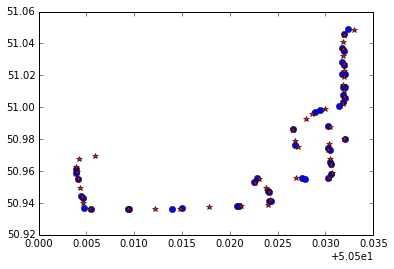

In [4]:
t = debug[debug["hash"] == 86]
z = t[debug["type"] == "bus"]
plt.plot(z['latitude'], z['longitude'], 'o') 
a = []
for i in range(x["num"][0]):
    a.append(k_means.cluster_centers_[i])

plt.plot(*zip(*a), marker='*', color='r', ls='')

In [4]:
unique = debug["hash"].unique()
min_data = len(data[data["hash"] == 86]["type"])
print (min_data)
idx = 86
for i in unique:
    new_min_data =  min((len(data[data["hash"] == i]["type"])), min_data)
    if new_min_data == min_data:
        min_data = new_min_data
        idx = i

print (min_data)
print (idx)

6275
6275
71


In [12]:
unique = debug["hash"].unique()
print (unique)


data1 = data[data["hash"] == 86]
route1 = route_to_stops_count[route_to_stops_count["hash"] == 86]
debug1 = debug[debug["hash"] == 86]

print (len(data[data["hash"] == 86]))
print (len(route1))
print (len(debug[debug["hash"] == 86]))

[86 11 71]
6275
1
47


In [8]:
data1 = data[data["hash"] == 86]
route1 = route_to_stops_count[route_to_stops_count["hash"] == 86]
debug1 = debug[debug["hash"] == 86]

data1.to_csv('data1.tsv', sep="\t")
route1.to_csv('route1.tsv', sep="\t")
debug1.to_csv('debug1.tsv', sep="\t")